## Explore stats

- Explore statistical connections between the weather variables in Aarhus, and the day ahead spot price for DK1 (West Denmark zone)

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from load_dfs import load_openmeteo,load_spotprices,load_consumption

In [3]:
AarhusWeatherdf=load_openmeteo()
DK1spot=load_spotprices()
DK1consumption=load_consumption()

/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DK1spotPricesdf.drop('PriceArea', axis=1, inplace=True)
/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Zonalconsumptiondf.drop('ConnectedArea', axis=1, inplace=True)
/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

## Pearson Correlation Coefficient Matrix

- measure the strength and direction of linear relationship between target and input features
- to determine if a simple linear regression, ridge regression or SVR with linear kernel might be a good model

In [4]:
#need to merge as one df, to run df.corr()
mergeddf = pd.merge(AarhusWeatherdf,DK1spot,left_on='time',right_on='HourDK')
mergeddf = pd.merge(mergeddf,DK1consumption,left_on='HourDK',right_on='HourDK')

In [5]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8770 entries, 0 to 8769
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   time                                          8770 non-null   datetime64[ns]
 1   temperature_2m (°C)                           8770 non-null   float64       
 2   relative_humidity_2m (%)                      8770 non-null   int64         
 3   dew_point_2m (°C)                             8770 non-null   float64       
 4   apparent_temperature (°C)                     8770 non-null   float64       
 5   precipitation (mm)                            8770 non-null   float64       
 6   rain (mm)                                     8770 non-null   float64       
 7   snowfall (cm)                                 8770 non-null   float64       
 8   snow_depth (m)                                8266 non-null   float6

In [6]:
mergeddf.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),HourUTC,HourDK,SpotPriceDKK,SpotPriceEUR,SharePPM,ShareMWh
0,2024-01-01 00:00:00,5.8,95,5.1,2.7,0.3,0.3,0.0,0.0,51,...,0.0,0.0,0.0,0.0,2023-12-31 23:00:00,2024-01-01 00:00:00,126.660004,16.990000,601701,2849.573442
1,2024-01-01 01:00:00,5.5,94,4.7,2.0,0.1,0.1,0.0,0.0,51,...,0.0,0.0,0.0,0.0,2024-01-01 00:00:00,2024-01-01 01:00:00,209.779999,28.139999,580010,2703.653892
2,2024-01-01 02:00:00,5.4,93,4.4,2.0,0.1,0.1,0.0,0.0,51,...,0.0,0.0,0.0,0.0,2024-01-01 01:00:00,2024-01-01 02:00:00,198.740005,26.660000,560793,2584.690347
3,2024-01-01 03:00:00,5.2,95,4.4,1.4,0.1,0.1,0.0,0.0,51,...,0.0,0.0,0.0,0.0,2024-01-01 02:00:00,2024-01-01 03:00:00,30.860001,4.140000,570795,2501.435226
4,2024-01-01 04:00:00,5.0,94,4.1,1.0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,2024-01-01 03:00:00,2024-01-01 04:00:00,-0.220000,-0.030000,514432,2031.555854


In [7]:
vardf = mergeddf.drop(['time','HourDK','HourUTC','HourDK'],axis=1)
corr=vardf.corr()

<Axes: >

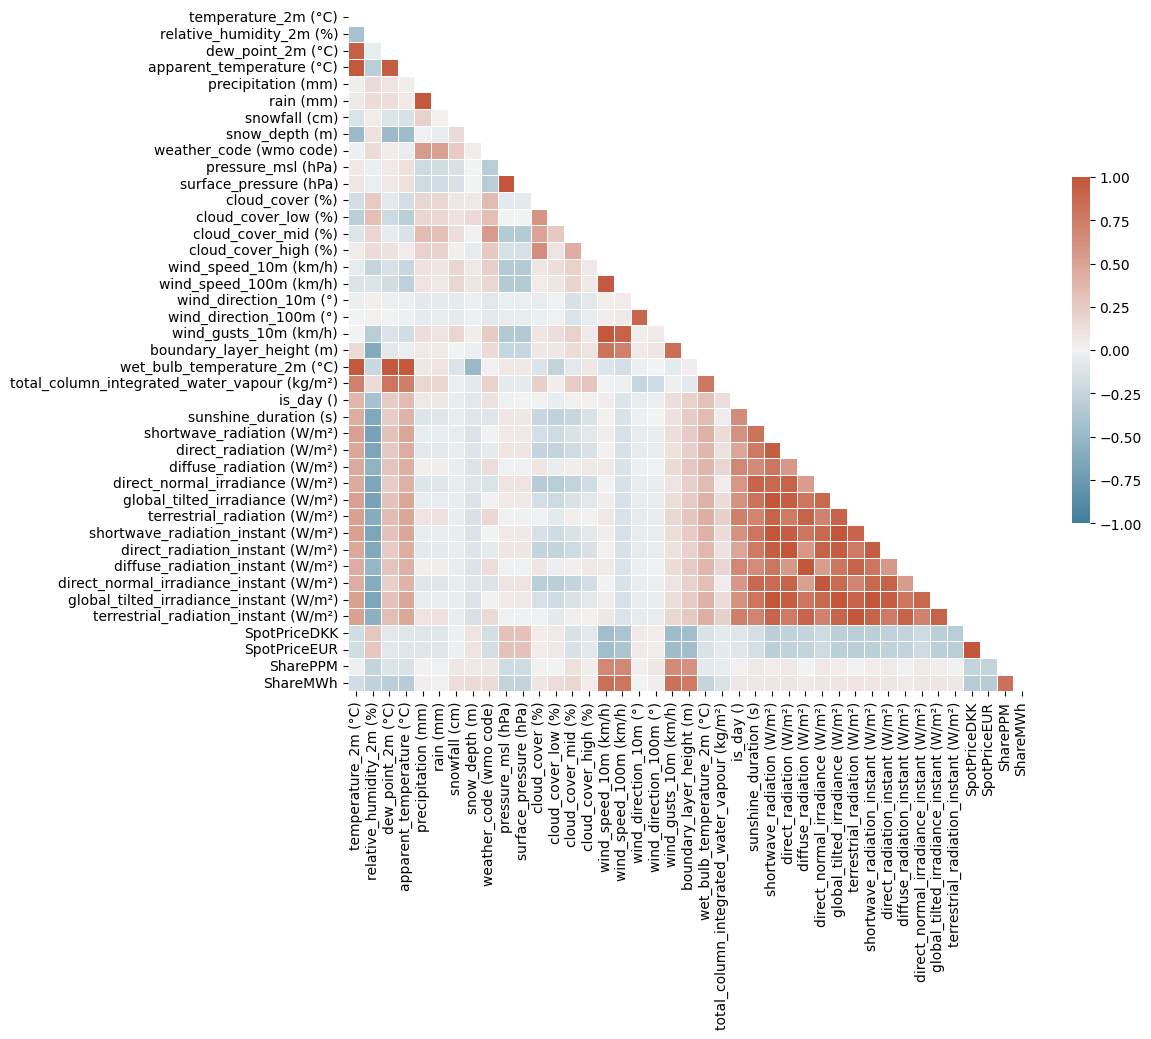

In [8]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
#expected 1:1 correlation between PriceDK and PriceEUR

(vardf['SpotPriceDKK']/vardf['SpotPriceEUR']).describe()

count    8721.000000
mean        7.457076
std         0.029519
min         7.000000
25%         7.457519
50%         7.458759
75%         7.460887
max         7.500000
dtype: float64

In [10]:
# Find the most highly correlated (or anti-correlated) variables with SpotPriceDKK
correlation_with_spotprice = corr['SpotPriceDKK'].sort_values(ascending=False)
print(correlation_with_spotprice)

SpotPriceDKK                                    1.000000
SpotPriceEUR                                    1.000000
pressure_msl (hPa)                              0.304134
surface_pressure (hPa)                          0.302773
relative_humidity_2m (%)                        0.270140
snow_depth (m)                                  0.087221
cloud_cover_low (%)                             0.054670
wind_direction_10m (°)                          0.049409
wind_direction_100m (°)                         0.037825
cloud_cover (%)                                 0.031564
snowfall (cm)                                  -0.023848
total_column_integrated_water_vapour (kg/m²)   -0.072920
cloud_cover_high (%)                           -0.082777
dew_point_2m (°C)                              -0.093332
apparent_temperature (°C)                      -0.098030
rain (mm)                                      -0.099388
precipitation (mm)                             -0.101819
is_day ()                      

In [15]:
top_positive_corr = correlation_with_spotprice.head(10)  # Top 10 positive correlations
top_negative_corr = correlation_with_spotprice.tail(10) 

print("Top positive correlations with SpotPriceEUR:")
print(top_positive_corr)

print("\nTop negative correlations with SpotPriceEUR:")
print(top_negative_corr)

Top positive correlations with SpotPriceEUR:
SpotPriceDKK                1.000000
SpotPriceEUR                1.000000
pressure_msl (hPa)          0.304134
surface_pressure (hPa)      0.302773
relative_humidity_2m (%)    0.270140
snow_depth (m)              0.087221
cloud_cover_low (%)         0.054670
wind_direction_10m (°)      0.049409
wind_direction_100m (°)     0.037825
cloud_cover (%)             0.031564
Name: SpotPriceDKK, dtype: float64

Top negative correlations with SpotPriceEUR:
shortwave_radiation (W/m²)                -0.301345
global_tilted_irradiance (W/m²)           -0.301345
global_tilted_irradiance_instant (W/m²)   -0.301588
terrestrial_radiation (W/m²)              -0.310421
terrestrial_radiation_instant (W/m²)      -0.314559
ShareMWh                                  -0.332948
wind_speed_100m (km/h)                    -0.395257
boundary_layer_height (m)                 -0.445945
wind_speed_10m (km/h)                     -0.448367
wind_gusts_10m (km/h)               

- Indicates to use wind speed and gusts, boundary layer height and pressure, and ShareMWH, but these may be intercorrelated

- Interesting that cloud cover is one of the least correlated variables, but this may be because solar installations are simply not in Aarhus

### investigate if highest correlated values are inter correlated

In [12]:
boundary_layer_corr = corr['boundary_layer_height (m)'].sort_values(ascending=False)
print(boundary_layer_corr)

boundary_layer_height (m)                       1.000000
wind_gusts_10m (km/h)                           0.840868
wind_speed_10m (km/h)                           0.809482
ShareMWh                                        0.758801
wind_speed_100m (km/h)                          0.720255
SharePPM                                        0.604655
terrestrial_radiation (W/m²)                    0.276451
diffuse_radiation (W/m²)                        0.272177
terrestrial_radiation_instant (W/m²)            0.258111
global_tilted_irradiance (W/m²)                 0.256944
shortwave_radiation (W/m²)                      0.256944
diffuse_radiation_instant (W/m²)                0.252893
global_tilted_irradiance_instant (W/m²)         0.246036
shortwave_radiation_instant (W/m²)              0.244812
sunshine_duration (s)                           0.235732
direct_normal_irradiance (W/m²)                 0.217844
direct_radiation (W/m²)                         0.214595
direct_radiation_instant (W/m²)

In [13]:
pressure_corr = corr['pressure_msl (hPa)'].sort_values(ascending=False)
print(pressure_corr)

pressure_msl (hPa)                              1.000000
surface_pressure (hPa)                          0.999975
SpotPriceDKK                                    0.304134
SpotPriceEUR                                    0.304123
apparent_temperature (°C)                       0.109950
direct_normal_irradiance (W/m²)                 0.087770
direct_normal_irradiance_instant (W/m²)         0.086672
direct_radiation_instant (W/m²)                 0.079359
direct_radiation (W/m²)                         0.079138
sunshine_duration (s)                           0.066653
temperature_2m (°C)                             0.060379
wet_bulb_temperature_2m (°C)                    0.055830
shortwave_radiation_instant (W/m²)              0.053515
global_tilted_irradiance (W/m²)                 0.053371
shortwave_radiation (W/m²)                      0.053371
global_tilted_irradiance_instant (W/m²)         0.053230
dew_point_2m (°C)                               0.049969
cloud_cover_low (%)            

In [14]:
relative_humidity_corr = corr['relative_humidity_2m (%)'].sort_values(ascending=False)
print(relative_humidity_corr)

relative_humidity_2m (%)                        1.000000
cloud_cover_low (%)                             0.326305
SpotPriceEUR                                    0.270213
SpotPriceDKK                                    0.270140
cloud_cover (%)                                 0.256450
cloud_cover_mid (%)                             0.173453
precipitation (mm)                              0.151536
rain (mm)                                       0.146364
cloud_cover_high (%)                            0.143159
total_column_integrated_water_vapour (kg/m²)    0.142109
weather_code (wmo code)                         0.139204
snow_depth (m)                                  0.102802
snowfall (cm)                                   0.043425
wind_direction_10m (°)                          0.016994
wind_direction_100m (°)                         0.009088
pressure_msl (hPa)                             -0.031742
surface_pressure (hPa)                         -0.034398
dew_point_2m (°C)              

In [17]:
# Find the most highly correlated (or anti-correlated) variables with ShareMWh
correlation_with_shareMWh = corr['ShareMWh'].sort_values(ascending=False)

top_positive_corr_shareMWh = correlation_with_shareMWh.head(10)  # Top 10 positive correlations
top_negative_corr_shareMWh = correlation_with_shareMWh.tail(10) 

print("Top positive correlations with ShareMWh:")
print(top_positive_corr_shareMWh)

print("\nTop negative correlations with ShareMWh:")
print(top_negative_corr_shareMWh)

Top positive correlations with ShareMWh:
ShareMWh                     1.000000
wind_gusts_10m (km/h)        0.823956
wind_speed_10m (km/h)        0.822491
SharePPM                     0.815345
wind_speed_100m (km/h)       0.789116
boundary_layer_height (m)    0.758801
cloud_cover_mid (%)          0.170020
snow_depth (m)               0.151882
weather_code (wmo code)      0.138484
cloud_cover_low (%)          0.130977
Name: ShareMWh, dtype: float64

Top negative correlations with ShareMWh:
total_column_integrated_water_vapour (kg/m²)   -0.139244
temperature_2m (°C)                            -0.179201
wet_bulb_temperature_2m (°C)                   -0.248902
pressure_msl (hPa)                             -0.259326
surface_pressure (hPa)                         -0.260288
relative_humidity_2m (%)                       -0.273774
dew_point_2m (°C)                              -0.301177
apparent_temperature (°C)                      -0.322658
SpotPriceEUR                                   -0.

## Potential input feature Intercorrelation conclusions

1. all wind and boundary layer height correlated
2. pressure and wind are anticorrelated
3. relative humidity anticorrelated with radiance variables but correlated with cloud cover
4. consumption (share MWh) highly correlated with wind, makes sense as lot of wind production in DK1

most correlations with spotprice are rather weak

## Feature Importance

- test ANOVA F-test or Feature Importances
- to test where a feature explains the variance in the target variable
- suitable models would be any that assume variance differences are important (linear or tree-based models)